<a href="https://colab.research.google.com/github/Acallan24/3Q/blob/master/NHAI1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [1]:
# Installing Libraries
! pip install pandas
! pip install numpy 
! pip install matplotlib
! pip install sklearn

In [ ]:
# Import required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
#Import and Vizualize our data
data = pd.read_csv('/content/Fuel.csv')
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


Text(0.5, 0, 'CO2EMISSIONS')

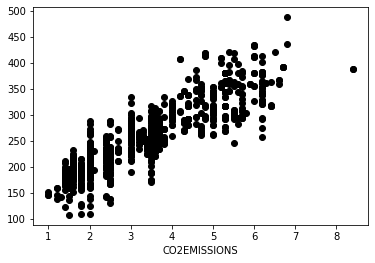

In [ ]:
#Vizualizing our data in terms of plots
plt.scatter(data["ENGINESIZE"], data['CO2EMISSIONS'], color="black")
plt.xlabel("ENGINESIZE")
plt.xlabel("CO2EMISSIONS")

In [ ]:
#dividing our model for training and testing 
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

In [ ]:
#train our model though out taining data
#Here we will use sklearn
#import the linear model
from sklearn import linear_model
reg = linear_model.LinearRegression()

train_x = np.array(train[["ENGINESIZE"]])
train_y = np.array(train[["CO2EMISSIONS"]])
reg.fit(train_x,train_y)

# The coefficients:
print ("coefficients : ",reg.coef_) #Slope
print ("Intercept : ",reg.intercept_) #Intercept

coefficients :  [[38.79512384]]
Intercept :  [127.16989951]


Text(0.5, 0, 'CO2EMISSIONS')

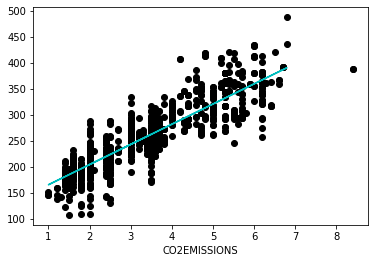

In [ ]:
plt.scatter(data["ENGINESIZE"], data['CO2EMISSIONS'], color="black")
plt.plot(train_x, reg.coef_*train_x + reg.intercept_, '-c')
plt.xlabel("ENGINESIZE")
plt.xlabel("CO2EMISSIONS")

In [ ]:
#predictions
def get_regression_predictions(input_features,intercept,slope):
 predicted_values = input_features*slope + intercept
 return predicted_values

In [ ]:
#lets predict for a random engine
engine_size = 4
emmision_rate = get_regression_predictions(engine_size, reg.intercept_[0], reg.coef_[0] [0])
print("The car's emmision rate is:", emmision_rate)

The car's emmision rate is: 282.35039485304554


In [ ]:
# How accurate was the prediction?
from sklearn.metrics import r2_score
test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
test_y_ = reg.predict(test_x)

print(r2_score(test_y_ , test_y))

0.7097615711758993
